# Week 3  - Network Analysis
Aaron Palumbo  
IS622 Web Analytics  

We will load data from https://snap.stanford.edu/data/#p2p. Specifically Gnutella peer to peer network from August 8 2002.

In [31]:
import networkx as nx
import pandas as pd
import IPython.display as display
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline
%qtconsole

Here we're going to use a wikipedia database described as:

Directed graph (each unordered pair of nodes is saved once): Wiki-Vote.txt 
Wikipedia voting on promotion to administratorship (till January 2008). Directed edge A->B means user A voted on B becoming Wikipedia administrator.  
Nodes: 7115 Edges: 103689  
FromNodeId	ToNodeId  
30	1412  
30	3352  
30	5254  
30	5543  
30	7478  

Let's start by loading the graph with NetworkX

In [33]:
df = pd.read_csv('Wiki-Vote.txt', sep='\t', skiprows=4, names=['fromN', 'toN'])
# prune this
df = df.iloc[:10000, :]
df.to_csv('Wiki-Vote.csv')

In [34]:
G = nx.Graph()
G.add_edges_from(zip(df.fromN, df.toN))
len(G)

1825

We've pared down the graph to just 1825 nodes. Let's see what the diameter of the graph is. The diameter is the longest node to node distance.

In [35]:
nx.diameter(G)

6

Six seems a little surprising, given we have 1825 nodes. I wonder if Kevin Bacon is part of this ...

I loaded the 1825 nodes into Gephi to look into this. Here is a plot of the network colored by InDegree.

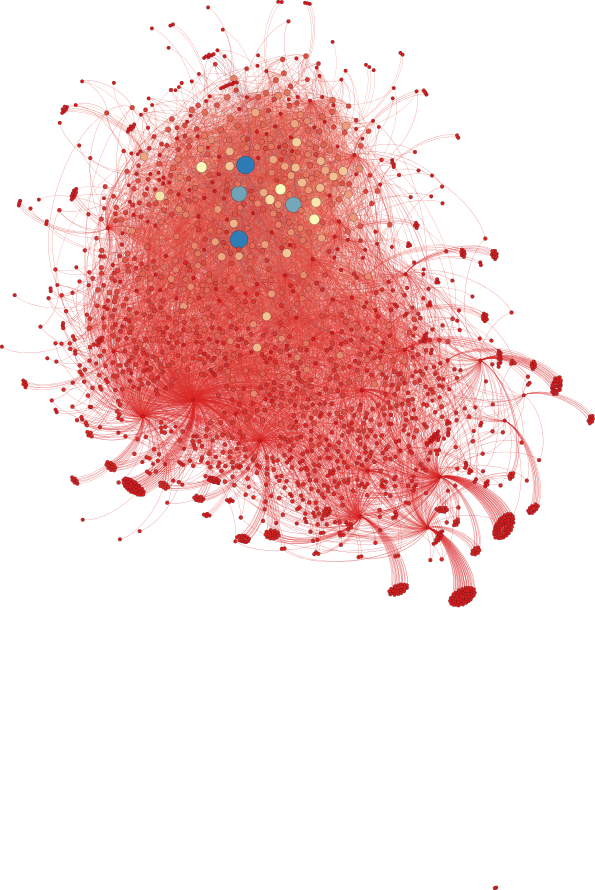

In [ ]:
display.Image('visual.png')

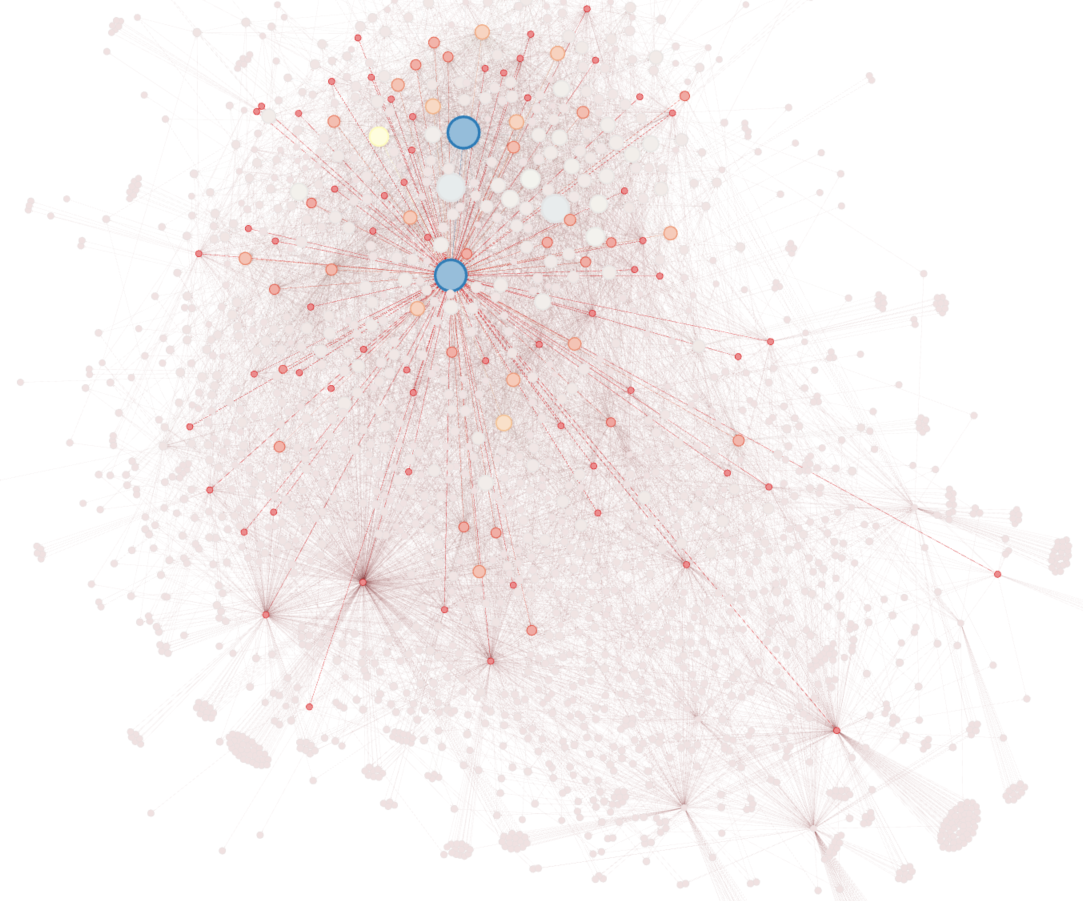

In [37]:
display.Image('reach.png')

In the next plot we see what is fairly typical in the graph, the nodes seem to have a lot of reach. This explains why the diameter is only six.

Since we're talking about distance, let's calculate a centrality measure. Before we do we need to pare down the graph

In [38]:
# we are following an example from Chapter 3 of Social Network Analysis for Startups
def trim_degrees(g, degree=1):
    g2=g.copy()
    d = nx.degree(g2)
    for n in g2.nodes():
        if d[n] <= degree: g2.remove_node(n)
    return g2

core5 = trim_degrees(G, degree=20)
len(core5)

180

We now have only 648 nodes. Let's try our centrality measure:

(array([  6.,   7.,  27.,  86.,  27.,  18.,   5.,   2.,   1.,   1.]),
 array([ 0.40681818,  0.44041022,  0.47400226,  0.5075943 ,  0.54118634,
         0.57477839,  0.60837043,  0.64196247,  0.67555451,  0.70914655,
         0.74273859]),
 <a list of 10 Patch objects>)

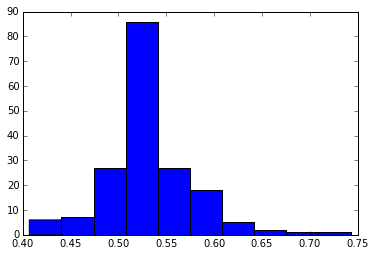

In [39]:
c = nx.closeness_centrality(core5)
plt.hist(c.values())

I don't have a good intuition on what the means, but it looks interesting. ;)